In [ ]:
import glob
import pandas as pd
df = pd.concat([pd.read_csv(f) for f in glob.glob('*.txt')], ignore_index = True, sort=False, axis=1)

In [ ]:
import glob
import pandas as pd
df = pd.concat([pd.read_csv(f) for f in glob.glob('*.txt')], ignore_index = True, sort=False, axis=1)

In [1]:
import numpy as np
import mne
import yasa
import scipy
from scipy import signal
data = np.loadtxt('data.txt')

In [2]:
data = data * 1e6

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 1000.
time = np.arange(data.size) / sf

sf2 = 500.
time2 = np.arange(data.size) / sf2

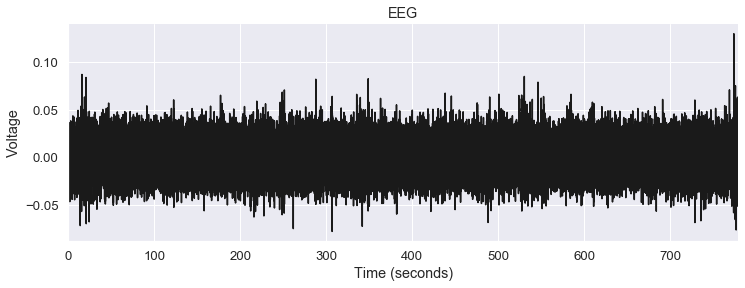

In [3]:
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('EEG')
sns.despine()

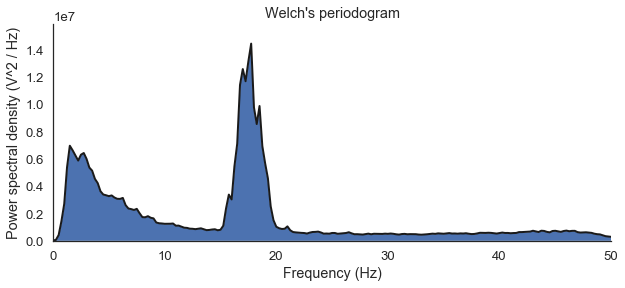

In [4]:
from scipy import signal

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win, scaling='spectrum')

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(10, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.fill_between(freqs, psd, cmap='Spectral')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 50])
sns.despine()

In [5]:
yasa.bandpower_from_psd(psd, freqs)

,Chan,Delta,Theta,Alpha,Beta,Gamma,FreqRes,Relative
0,CHAN001,0.213686,0.139407,0.065013,0.515815,0.066079,0.25,True


In [13]:
yasa.bandpower(data, sf, win_sec=2, relative=False)

,Delta,Theta,Alpha,Beta,Gamma,FreqRes,Relative
Chan,,,,,,,
CHAN001,3.994591e+07,2.832307e+07,1.423627e+07,4.738046e+07,1.478880e+07,0.5,False


Text(0, 0.5, 'Frequency')

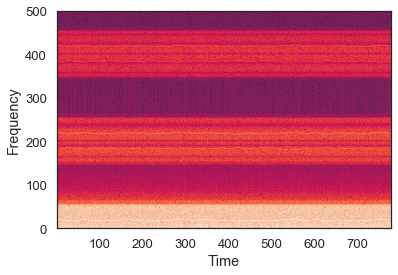

In [7]:
plt.specgram(data, NFFT=1024, Fs = 1000, noverlap=128,
        cmap=None, xextent=None, pad_to=None, sides='default',
        scale_by_freq=50, mode='default', aspect='auto')

plt.xlabel('Time')

plt.ylabel('Frequency')

#Downsampling para 500Hz

In [8]:
data2 = scipy.signal.decimate(data,2)

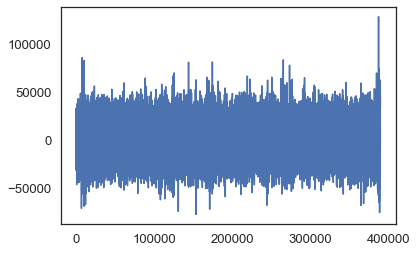

In [9]:
plt.plot(data2)

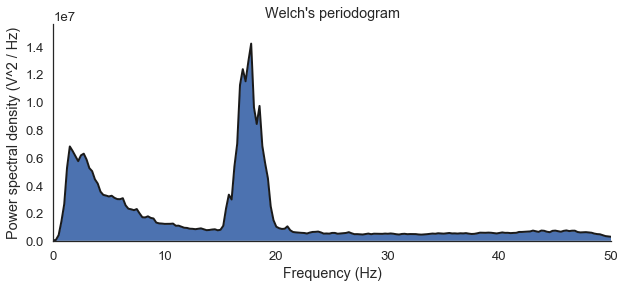

In [10]:
from scipy import signal

# Define window length (4 seconds)
win = 4 * sf2
freqs, psd2 = signal.welch(data2, sf2, nperseg=win, scaling='spectrum')

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(10, 4))
plt.plot(freqs, psd2, color='k', lw=2)
plt.fill_between(freqs, psd2, cmap='Spectral')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd2.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 50])
sns.despine()

In [11]:
yasa.bandpower_from_psd(psd2, freqs)

,Chan,Delta,Theta,Alpha,Beta,Gamma,FreqRes,Relative
0,CHAN001,0.21247,0.138719,0.064797,0.516982,0.067031,0.25,True


Text(0, 0.5, 'Frequency')

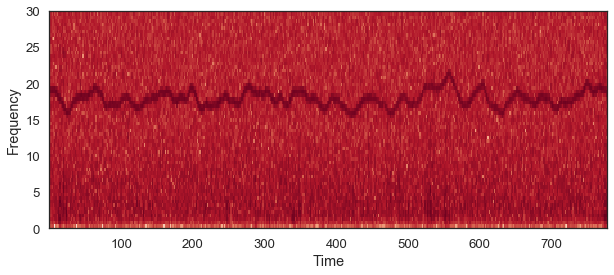

In [12]:
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(10, 4))
plt.specgram(data2, Fs = sf2, mode='default', NFFT=1024, cmap='RdBu_r')
plt.xlabel('Time')
plt.ylim([0,30])
plt.ylabel('Frequency')